In [ ]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### Loading CSV Files

In [ ]:
# df_train = pd.read_csv('Data/Validation plus Testing Data/2ndLevelTrain.csv',header=None)
df_test = pd.read_csv('2ndLevelTest.csv',header=None)

In [ ]:
print(df_train.shape)

### Dropping first 2 Rows since it is unnecessary

In [ ]:
# df_train.drop(index=df_train.index[0], axis=0, inplace=True)
df_test.drop(index=df_test.index[0], axis=0, inplace=True)
# df_train.drop(index=df_train.index[0], axis=0, inplace=True)
df_test.drop(index=df_test.index[0], axis=0, inplace=True)


In [ ]:
print(df_train.shape)

### Duplicating data for each module and for label

In [ ]:
# dflabels_train = df_train
dflabels_test = df_test

### Dropping Columns to get data for specific module

In [ ]:
# df_train = df_train.drop(3,axis = 1)
# dflabels_train = dflabels_train.drop(dflabels_train.iloc[:,0:3],axis = 1)

df_test = df_test.drop(3,axis = 1)
dflabels_test = dflabels_test.drop(dflabels_test.iloc[:,0:3],axis = 1)

In [ ]:
# df_train = df_train.to_numpy()
# dflabels_train = dflabels_train.to_numpy()

df_test = df_test.to_numpy()
dflabels_test = dflabels_test.to_numpy()

In [ ]:
print(df_train.shape)
print(dflabels_train.shape)

In [ ]:
input_shape = 3
num_classes = 2

In [ ]:
LABELS = ['Awake','Drowsy']

In [ ]:
df_train = df_train.astype('float32')
dflabels_train = dflabels_train.astype('float32')

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
model = keras.models.load_model("Early Models/best_model(2ndlevelv2).h5")

test_loss, test_acc = model.evaluate(df_train, dflabels_train,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
dftrainlabels_hot = np_utils.to_categorical(dflabels_train, 2)
# Print confusion matrix for training data
y_pred_train = model.predict(df_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(dftrainlabels_hot, axis=1)


In [ ]:
print(max_y_train)
print(max_y_pred_train)

In [ ]:

show_confusion_matrix(max_y_train, max_y_pred_train)
# show_confusion_matrix(dflabels_train, max_y_pred_train)

### Building the Model

In [ ]:
model = Sequential()
model.add(Dense(1,input_shape=(input_shape,), activation='sigmoid'))
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 25
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(2ndlevel).h5", save_best_only=True, monitor="val_loss"
    ),
    # keras.callbacks.ReduceLROnPlateau(
    #     monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    # ),
    # keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    df_train,
    dflabels_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


# Print confusion matrix for training data
y_pred_train = model.predict(df_train)

In [ ]:
new_y_pred_train = np.rint(y_pred_train)
print(new_y_pred_train)  

print(classification_report(dflabels_train, new_y_pred_train))

### Checking agains Testing Data

In [12]:
dftest = df_test.astype('float32')
dftestlabels = dflabels_test.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [13]:
LABELS = ['Awake','Drowsy']

In [14]:
model = keras.models.load_model("Early Models/best_model(2ndlevelv2).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

66/66 [==============================] - 0s 553us/step - loss: 0.4303 - accuracy: 1.0000
Test accuracy 1.0
Test loss 0.43031132221221924


66/66 [==============================] - 0s 494us/step
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


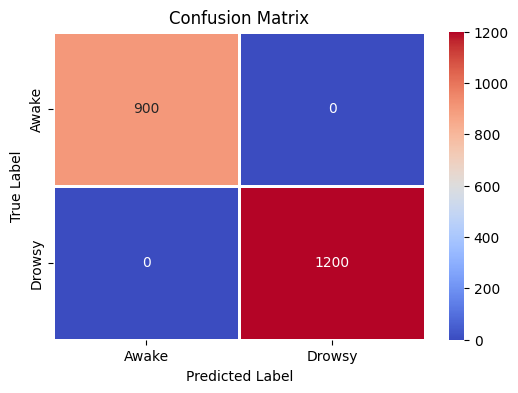

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00      1200

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [15]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions

new_y_pred_test = np.rint(y_pred_test)
print(new_y_pred_test)  

max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, new_y_pred_test)

print(classification_report(max_y_test, new_y_pred_test))

### ROC and AUC

66/66 [==============================] - 0s 548us/step
[0.45772827 0.45772827 0.45772827 ... 0.6203386  0.6203386  0.6203386 ]


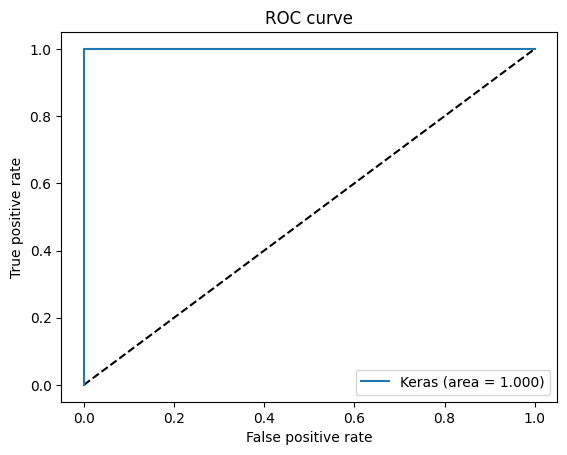

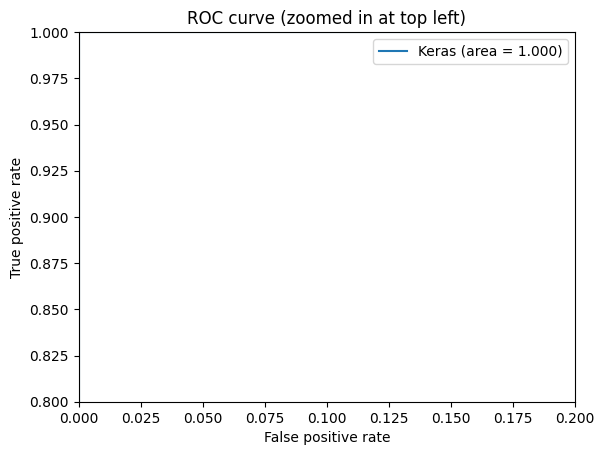

In [22]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_scores = model.predict(dftest).ravel()
print(y_scores)



# calculate ROC curve
fpr, tpr, thresholds = roc_curve(dftestlabels, y_scores)

auc_keras = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()